<div style="background-color: #bfd630; font-family: Calibri, sans-serif; padding: 20px;">



   <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 20px; margin-bottom: 60px;">
   </div>
      
   <div style="text-align: center; font-size: 24px; font-weight: bold; font-family: Calibri; color: #000000; margin-bottom: 20px;">
      Data Mining 2024/2025 - Customer Segmentation - ABCDEats Inc
   <div style="text-align: center; font-size: 20px; font-weight: bold; font-family: Calibri; color: #000000; margin-bottom: 20px;">
   </div>
   <div style="text-align: center; font-family: Calibri; font-size: 22px; color: #000000; font-weight: bold; margin-bottom: 20px;">
      Merging Perpectives
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 5px;">
      Nova Information Management School
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 20px;">
      Universidade Nova de Lisboa
   </div>
        <div style="text-align: center; font-size: 16px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 10px;">
      Master in Data Science and Advanced Analytics
   </div>
 
   <div style="text-align: center;">
      <img src="https://cdn.prod.website-files.com/617accb8b04ef2b3feffa61b/6581e90d485a9976c3576a46_how-does-workers-comp-work.jpg" style="width: 350px; margin-top: 20px; margin-bottom: 60px;">
   </div>





   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; font-weight: bold; margin-bottom: 20px;">
      Project Group: 10
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 40px">
        Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
        Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
        Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
        Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 10px">
      Fall/Spring Semester 2024-2025
   </div>

  <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 20px;">
      3th of January 2025
   </div>

   
</div>


# **<h1 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**
### **<h3 align="center">Merging Perpectives</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import Data](#import_dataset)
* [3. Final Labels](#final_labels)
* [4. Merging Different Perpectives](#merge_perpectives)
    * [4.1. Contingency Table](#contigency_table)
    * [4.2. Manual Merging of Clusters](#manual_merg_clus)
    * [4.3. Using Hierarchical Clustering](#hierarchical_clust)
* [6. Cluster Analysis ](#cluster_analysis)
* [7. Association Rules](#association_rules)




---

In this notebook, we will merge the segmentation results from two distinct perspectives: **cuisine preferences** and **customer behavior**. These two perspectives represent different customer behaviors and preferences, and combining them will allow us to develop a more holistic understanding of our customers. 

We will begin by merging the clusters derived from cuisine preference features with those from customer behavior, ensuring that we create a unified dataset with both segmentation labels. Once the merge is completed, we will explore the resulting segments and evaluate their characteristics.

---

# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from matplotlib.patches import RegularPolygon, Ellipse
import json
from sklearn.cluster import KMeans

#To perform Clustering Algorithms
from sklearn.cluster import MeanShift, estimate_bandwidth
# from sklearn_extra.cluster import KMedoids # pip install scikit-learn-extra
from scipy.cluster.hierarchy import dendrogram, linkage
from minisom import MiniSom
from sklearn.metrics import pairwise_distances, euclidean_distances

import warnings
warnings.filterwarnings("ignore")

#Importing the functions created in utils.py
from utils import *
import importlib
imported_module = importlib.import_module("utils")
importlib.reload(imported_module)

<module 'utils' from 'c:\\Users\\xandg\\Ambiente de Trabalho\\IMS\\3rd year\\1st Semester\\Capstone Project\\OpenAI\\Capstone-Project\\CustomerSegmentationDataMining\\deliverables\\utils.py'>

# 2. Import Data <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the preprocessed dataset and set the customer_id as the index column. Also, check the first and last 5 rows of the dataset.

In [3]:
df_clustering = pd.read_csv("../Data/df_perspectives_labels.csv", index_col="customer_id")
df_clustering.head().T

customer_id,1b8f824d5e,f6d1b2ba63,180c632ed8,4eb37a6705,6aef2b6726
customer_region,2360,4660,4660,4660,8670
customer_age,-1.366137,1.481241,-0.227186,-1.0814,1.765979
vendor_count,-0.404103,-0.77418,-0.404103,-0.404103,-0.404103
product_count,-0.084407,-0.564201,-0.40427,-0.084407,-0.564201
chain_orders,-0.474819,-0.208274,-0.474819,-0.741365,-0.741365
...,...,...,...,...,...
prop_orders_afternoon,-1.069308,-1.069308,0.240297,-1.069308,-1.069308
prop_orders_evening,2.639351,-0.630631,-0.630631,-0.630631,-0.630631
products_per_vendor,0.817727,0.283289,-0.25115,0.817727,-0.785589
cuisine_labels,3,1,3,2,2


Let's open the json file with the categories.

In [5]:
# Load the categories dictionary from the JSON file
with open("perspectives.json", "r") as file:
    loaded_categories = json.load(file)

print("Categories dictionary has been successfully loaded!")
print(loaded_categories)

Categories dictionary has been successfully loaded!
{'customer_behavior': ['prop_chain_orders', 'prop_weekend_orders', 'prop_orders_dawn', 'prop_orders_morning', 'prop_orders_evening', 'first_order', 'order_recency', 'total_cui_spending', 'avg_order_value', 'products_per_vendor'], 'cuisine_preferences': ['prop_cui_cafe', 'prop_cui_chicken dishes', 'prop_cui_chinese', 'prop_cui_desserts', 'prop_cui_healthy', 'prop_cui_indian', 'prop_cui_japanese', 'prop_cui_noodle dishes', 'prop_cui_thai', 'prop_cui_asian_origin', 'prop_cui_western', 'prop_cui_other_origin', 'prop_cui_main_dishes'], 'demographics': ['customer_region', 'city', 'generation', 'customer_age', 'last_promo', 'payment_method', 'promo_used']}


In [6]:
cuisine_preferences = loaded_categories["cuisine_preferences"]
customer_behavior = loaded_categories["customer_behavior"]

# RFM <a class="anchor" id="rfm"></a>
[Back to ToC](#toc)<br>

RFM (Recency, Frequency, and Monetary) analysis is a customer segmentation technique that evaluates customer behavior based on three dimensions:
1. **Recency (R)**: How recently a customer made a purchase. More recent activity indicates a higher likelihood of engagement.
   - **Feature**: `order_recency`
   - **Description**: Time since the customer's last order, identifying recent engagement.

2. **Frequency (F)**: How often a customer makes purchases. Frequent customers are more likely to be loyal.
   - **Feature**: `total_orders`
   - **Description**: Total number of orders placed, measuring customer activity.

3. **Monetary (M)**: How much money a customer spends. Higher spending reflects greater customer value.
   - **Feature**: `total_cui_spending`
   - **Description**: Total spending by the customer, reflecting their monetary contribution.

These features allow us to evaluate customer behavior and create actionable clusters to target specific segments for personalized strategies.


In [333]:
rfm_data= df_clustering[['order_recency','total_orders','total_cui_spending']]
rfm_data.head()

,order_recency,total_orders,total_cui_spending
customer_id,,,
1b8f824d5e,-2.703786,-0.486044,-0.202731
f6d1b2ba63,-2.703786,-0.486044,-0.759277
180c632ed8,-2.660642,-0.486044,-0.126941
4eb37a6705,-2.660642,-0.486044,0.548381
6aef2b6726,-2.660642,-0.486044,-0.314719


In [334]:
rfm_data.head()

,order_recency,total_orders,total_cui_spending
customer_id,,,
1b8f824d5e,-2.703786,-0.486044,-0.202731
f6d1b2ba63,-2.703786,-0.486044,-0.759277
180c632ed8,-2.660642,-0.486044,-0.126941
4eb37a6705,-2.660642,-0.486044,0.548381
6aef2b6726,-2.660642,-0.486044,-0.314719


In [335]:
# Binning Recency, Frequency, and Monetary
M_segmentation = pd.qcut(rfm_data['total_cui_spending'], q=3, labels=False) +1  # High = high value
R_segmentation = pd.qcut(rfm_data['order_recency'], q=3, labels=False) +1  # Recent = better
F_segmentation = pd.qcut(rfm_data['total_orders'], q=3, labels=False) +1  # High = frequent

#Combine into RFM Segmentation
rfm_segmentation = pd.DataFrame(
    {'total_cui_spending': M_segmentation, 'order_recency': R_segmentation, 'total_orders': F_segmentation}
)

#Add Original Values
rfm_segmentation['monetary_value'] = rfm_data['total_cui_spending']
rfm_segmentation['customer_recency'] = rfm_data['order_recency']
rfm_segmentation['customer_frequency'] = rfm_data['total_orders']

# Create RFM Segment Labels
rfm_segmentation['segment'] = (
    rfm_segmentation['order_recency'].astype(str)
    + "-" + rfm_segmentation['total_orders'].astype(str)
    + "-" + rfm_segmentation['total_cui_spending'].astype(str)
)

# Calculate Correlation Matrix
rfm_corr = rfm_segmentation[['monetary_value', 'customer_recency', 'customer_frequency']].corr()

print("Correlation Matrix for RFM Metrics:")
rfm_corr

Correlation Matrix for RFM Metrics:


,monetary_value,customer_recency,customer_frequency
monetary_value,1.000000,0.344130,0.710463
customer_recency,0.344130,1.000000,0.378048
customer_frequency,0.710463,0.378048,1.000000



The correlation matrix between the RFM metrics (Recency, Frequency, and Monetary) reveals the following insights:

- **Monetary and Frequency** have a high correlation (r = 0.74), indicating overlap in the information they provide.
- **Frequency and Recency** have a moderate correlation (r = 0.42).
- **Monetary and Recency** have the lowest correlation (r = 0.34), suggesting they provide more distinct insights.

To simplify the analysis and focus on the most distinct metrics, we will:
1. Remove **Frequency** due to its high correlation with Monetary.
2. Create a bubble plot using only **Recency** and **Monetary**, which represent distinct customer behaviors.

This simplification aligns with the approach used in the previous project, where only the most relevant dimensions were retained for clustering and visualization.

In [336]:
# Adjust column names for aggregation
rfm_segmentation.rename(
    columns={
        'order_recency': 'Recency',
        'total_orders': 'Frequency',
        'total_cui_spending': 'Monetary'
    },
    inplace=True
)

In [337]:
rfm_segmentation.describe()

,Monetary,Recency,Frequency,monetary_value,customer_recency,customer_frequency
count,31095.000000,31095.000000,31095.000000,3.109500e+04,3.109500e+04,3.109500e+04
mean,1.999904,1.985335,1.844927,4.387336e-17,-2.193668e-16,-1.462445e-17
std,0.816529,0.809455,0.845159,1.000016e+00,1.000016e+00,1.000016e+00
min,1.000000,1.000000,1.000000,-1.008988e+00,-2.746929e+00,-6.984408e-01
25%,1.000000,1.000000,1.000000,-6.525210e-01,-6.328977e-01,-4.860438e-01
50%,2.000000,2.000000,2.000000,-3.373425e-01,2.731159e-01,-2.736468e-01
75%,3.000000,3.000000,3.000000,2.385760e-01,8.339815e-01,1.511471e-01
max,3.000000,3.000000,3.000000,3.802964e+00,1.135986e+00,1.650571e+01


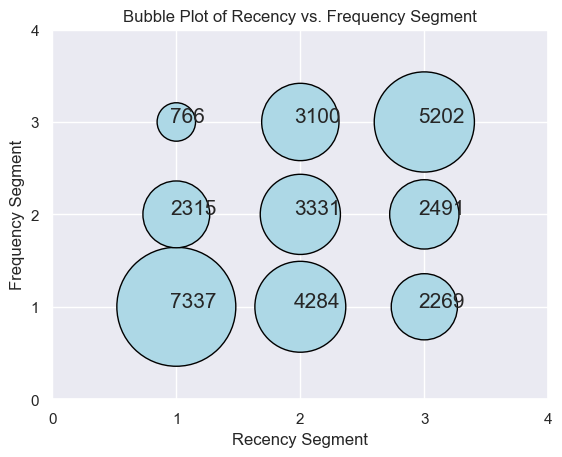

In [338]:
def create_2d_bubble(rf_segment, variable, multiplier, colorbubble):
  '''
  Creates 2-dimensional bubble plot with detailed
  RF segment information.

  Arguments:
  - rf_segment(pd.DataFrame): Dataframe with segments
  data.
  - variable(str): Variable to use as bubble size.
  - multiplier(int): Multiplier to add emphasis to the 
  bubble size.
  - colorbubble(str): color of the bubble plot

  Returns:
  - None, but a plot is shown.
  '''
  fig, ax = plt.subplots()

  # Create the scatter plot 
  # Multiplying by 25 just to see more difference between
  # bubbles
  sc = ax.scatter(rf_segment.Recency, 
            rf_segment.Frequency, 
            s=rf_segment[variable]*multiplier,
            color=colorbubble,
            edgecolors='black')

  # Annotate plot with size
  for i in range(len(rf_segment.Recency)):
    ax.annotate(np.round(rf_segment[variable].iloc[i], 1),
                (rf_segment.Recency.iloc[i]-0.05,
                rf_segment.Frequency.iloc[i]),
                fontsize=15
                )

  plt.title('Bubble Plot of Recency vs. Frequency Segment')
  plt.xlabel('Recency Segment')
  plt.ylabel('Frequency Segment')
  plt.xticks([0,1,2,3,4])
  plt.yticks([0,1,2,3,4])

  plt.show()
  
# Aggregate data for Frequency and Recency groups
segment_size = rfm_segmentation.groupby(['Frequency', 'Recency'], as_index=False).size()
segment_value = rfm_segmentation.groupby(['Frequency', 'Recency'], as_index=False)['monetary_value'].mean()

# Merge size and monetary value
segment_info = segment_size.merge(segment_value, on=['Frequency', 'Recency'])

# Create a bubble plot for size
create_2d_bubble(segment_info, 'size', 1, 'lightblue')  # Bubbles sized by number of customers

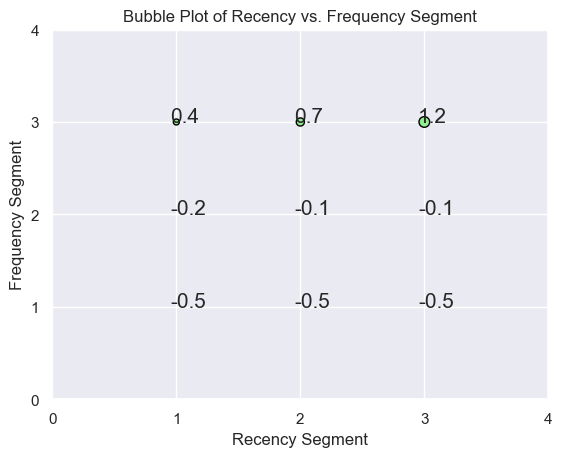

In [339]:
# Create a bubble plot for monetary value
create_2d_bubble(segment_info, 'monetary_value', 50, 'lightgreen')  # Bubbles sized by average monetary value

# 3. Final Labels <a class="anchor" id="final_labels"></a>
[Back to ToC](#toc)<br>

After completing notebooks 02 and 03, we will run the models using the best solution and store the resulting labels to proceed with merging the different perspectives.

> ### Cuisine Preferences
Run kMedoids clustering with 4 clusters and add the cluster labels to the dataframe.

In [341]:
# run kMedoids clustering with 4 clusters and add the cluster labels to the dataframe
kmclust = KMedoids(n_clusters=5, init='k-medoids++', max_iter=300, random_state=42) 
df_clustering['cuisine_labels'] = kmclust.fit_predict(df_clustering[cuisine_preferences])

> ### Customer Behavior
Run kmeans-clustering approach and add the cluster labels to the dataframe.

In [342]:
# kmeans-clustering approach for customer behavior
kmeans_50c = KMeans(n_clusters=50, init='k-means++', n_init=15, random_state=42)
kmeans_labels_50c = kmeans_50c.fit_predict(df_clustering[customer_behavior])
df_centroids_kmeans_50c = pd.DataFrame(kmeans_50c.cluster_centers_, columns=customer_behavior)

In [343]:
# Initialize and fit AgglomerativeClustering for KMeans_Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
cluster_labels = hc.fit_predict(df_centroids_kmeans_50c)

df_centroids_kmeans_50c['behavior_labels'] = cluster_labels

reduced_centroids = df_centroids_kmeans_50c.groupby('behavior_labels').mean()

# Compute distances between each original data point and the reduced centroids
distances = euclidean_distances(df_clustering[customer_behavior], reduced_centroids)

# Assign each data point to the closest reduced centroid
mapped_clusters = np.argmin(distances, axis=1)

# Add the mapped cluster labels to the original dataset
df_clustering['behavior_labels'] = mapped_clusters

Print the dataset with labels.

In [9]:
df_clustering[['behavior_labels', 'cuisine_labels']].head()

,behavior_labels,cuisine_labels
customer_id,,
1b8f824d5e,0,3
f6d1b2ba63,0,1
180c632ed8,0,3
4eb37a6705,3,2
6aef2b6726,2,2


# 4. Merging Different Perpectives <a class="anchor" id="merge_perpectives"></a>
[Back to ToC](#toc)<br>

Now that we have successfully stored our final cluster labels, we can proceed to merge them and determine the final cluster solution.

## 4.1. Contigency Table <a class="anchor" id="contigency_table"></a>
[Back to 4. Merging Different Perpectives](#merge_perpectives)<br>

In [10]:
# Count label frequencies (contigency table)
pd.crosstab(df_clustering['cuisine_labels'],
            df_clustering['behavior_labels'])

behavior_labels,0,1,2,3
cuisine_labels,,,,
0,3086,533,845,860
1,4804,694,442,204
2,7544,1428,2278,857
3,1089,120,17,81
4,5554,510,53,96


As anticipated, we have too many clusters, with several being sparsely populated. To address this, we can reassign these less populated clusters Each with fewer than 500 customers to their closest neighboring clusters.  

This approach involves manual merging, where the lowest frequency clusters are consolidated into the most similar, larger clusters.

In [11]:
# Get centroids of clusters for both taste and purchasing habits
df_centroids = df_clustering.groupby(['cuisine_labels', 'behavior_labels'])[cuisine_preferences + customer_behavior ].mean()
df_centroids

prop_cui_cafe  prop_cui_chicken dishes  \
cuisine_labels behavior_labels                                           
0              0                     0.635799                -0.204340   
               1                     0.788712                -0.246116   
               2                    -0.118353                -0.253249   
               3                    -0.036406                -0.253249   
1              0                    -0.080863                -0.231699   
               1                    -0.028389                -0.246284   
               2                    -0.141285                -0.253249   
               3                    -0.165511                -0.253249   
2              0                    -0.076426                -0.205679   
               1                     0.011401                -0.225201   
               2                    -0.165511                -0.251249   
               3                    -0.159292                -0.253249   
3              0                    -0.131792                -0.184070   
               1                    -0.114717                -0.199314   
               2                    -0.165511                -0.253249   
               3                    -0.165511                -0.253249   
4              0                    -0.093252                 0.966206   
               1                     0.077629                 0.333782   
               2                    -0.145105                 0.594008   
               3                    -0.139683                -0.156869   

                                prop_cui_chinese  prop_cui_desserts  \
cuisine_labels behavior_labels                                        
0              0                       -0.217311           0.659403   
               1                       -0.207726           0.305157   
               2                       -0.247218           0.703900   
               3                       -0.252998           0.473492   
1              0                       -0.241826          -0.163443   
               1                       -0.229843          -0.178671   
               2                       -0.234610          -0.120650   
               3                       -0.257799          -0.159066   
2              0                        0.368968          -0.109820   
               1                        0.174369          -0.062821   
               2                       -0.023397          -0.059307   
               3                        0.022178          -0.131159   
3              0                       -0.225733          -0.174156   
               1                       -0.212163          -0.187486   
               2                       -0.270186          -0.194286   
               3                       -0.270186          -0.194286   
4              0                       -0.003808          -0.127097   
               1                        0.059559          -0.144977   
               2                       -0.119626          -0.181311   
               3                       -0.187207          -0.190344   

                                prop_cui_healthy  prop_cui_indian  \
cuisine_labels behavior_labels                                      
0              0                        0.740926        -0.237497   
               1                        0.623712        -0.251483   
               2                        0.678915        -0.278089   
               3                        0.023313        -0.280506   
1              0                       -0.151326        -0.227796   
               1                       -0.148958        -0.214013   
               2                       -0.141686        -0.273137   
               3                       -0.204096        -0.259571   
2              0                       -0.104615        -0.114160   
               1                       -0.081572        -0.114633   
            

In [12]:
# Minimum cluster size threshold
MIN_CLUSTER_SIZE = 500

# Identify low-frequency clusters
low_freq_clusters = df_clustering.value_counts(['cuisine_labels', 'behavior_labels'])
to_merge = low_freq_clusters[low_freq_clusters < MIN_CLUSTER_SIZE].index.tolist()

In [13]:
print("Centroid Index:")
print(df_centroids.index)
print("Clusters to Merge:")
print(to_merge)

Centroid Index:
MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (1, 0),
            (1, 1),
            (1, 2),
            (1, 3),
            (2, 0),
            (2, 1),
            (2, 2),
            (2, 3),
            (3, 0),
            (3, 1),
            (3, 2),
            (3, 3),
            (4, 0),
            (4, 1),
            (4, 2),
            (4, 3)],
           names=['cuisine_labels', 'behavior_labels'])
Clusters to Merge:
[(1, 2), (1, 3), (3, 1), (4, 3), (3, 3), (4, 2), (3, 2)]


In [14]:
# Filter clusters to merge based on available centroids
valid_to_merge = [clus for clus in to_merge if clus in df_centroids.index]

# Compute pairwise Euclidean distances between centroids
centroid_dists = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    centroid_dists,
    columns=df_centroids.index,
    index=df_centroids.index
)

# Iteratively merge low-frequency clusters
df_ = df_clustering.copy()

while valid_to_merge:
    # Map each low-frequency cluster to its nearest valid neighbor
    source_target = {}
    valid_targets = [
        clus for clus in df_centroids.index 
        if clus not in valid_to_merge  # Exclude low-frequency clusters as targets
    ]

    for clus in valid_to_merge:
        # If the cluster has not already been used as a target, proceed
        if clus not in source_target.values() and valid_targets:
            # Find the closest valid target cluster
            closest_target = (
                df_dists.loc[clus, valid_targets]
                .sort_values()
                .index[0]
            )
            source_target[clus] = closest_target

    # Apply the source-to-target mappings to the dataset
    for source, target in source_target.items():
        # Create a mask for the rows belonging to the source cluster
        mask = (df_['cuisine_labels'] == source[0]) & (df_['behavior_labels'] == source[1])
        # Reassign rows to the target cluster
        df_.loc[mask, 'cuisine_labels'] = target[0]
        df_.loc[mask, 'behavior_labels'] = target[1]

    # Update cluster centroids after reassignment
    # Recalculate centroids if needed (not shown here, assuming it's done elsewhere)

    # Recompute low-frequency clusters
    low_freq_clusters = df_.value_counts(['cuisine_labels', 'behavior_labels'])
    valid_to_merge = low_freq_clusters[low_freq_clusters < MIN_CLUSTER_SIZE].index.tolist()
    valid_to_merge = [clus for clus in valid_to_merge if clus in df_centroids.index]

# Generate the final contingency table
final_contingency_table = pd.crosstab(df_['cuisine_labels'], df_['behavior_labels'])

#Validate that all clusters meet the size threshold
final_cluster_sizes = df_.value_counts(['cuisine_labels', 'behavior_labels'])
assert all(final_cluster_sizes >= MIN_CLUSTER_SIZE), "Some clusters still have less than the minimum size!"

In [15]:
print("Final Contingency Table After Merging:")
final_contingency_table

Final Contingency Table After Merging:


behavior_labels,0,1,2,3
cuisine_labels,,,,
0,3086,533,845,860
1,5008,694,0,0
2,7544,1428,2720,857
3,1307,0,0,0
4,5703,510,0,0


In [352]:
print("Original Contingency Table:")
pd.crosstab(df_clustering['cuisine_labels'], df_clustering['behavior_labels'])

Original Contingency Table:


behavior_labels,0,1,2,3
cuisine_labels,,,,
0,3086,533,845,860
1,4804,694,442,204
2,7544,1428,2278,857
3,1089,120,17,81
4,5554,510,53,96


## 4.2. Using Hierarchical Clustering <a class="anchor" id="hierarchical_clust"></a>
[Back to 4. Merging Different Perpectives](#merge_perpectives)<br>

In [17]:
# Get centroids of clusters for both cuisine and behavior labels
df_centroids = df_clustering.groupby(['cuisine_labels', 'behavior_labels'])[cuisine_preferences + customer_behavior].mean()
df_centroids

prop_cui_cafe  prop_cui_chicken dishes  \
cuisine_labels behavior_labels                                           
0              0                     0.635799                -0.204340   
               1                     0.788712                -0.246116   
               2                    -0.118353                -0.253249   
               3                    -0.036406                -0.253249   
1              0                    -0.080863                -0.231699   
               1                    -0.028389                -0.246284   
               2                    -0.141285                -0.253249   
               3                    -0.165511                -0.253249   
2              0                    -0.076426                -0.205679   
               1                     0.011401                -0.225201   
               2                    -0.165511                -0.251249   
               3                    -0.159292                -0.253249   
3              0                    -0.131792                -0.184070   
               1                    -0.114717                -0.199314   
               2                    -0.165511                -0.253249   
               3                    -0.165511                -0.253249   
4              0                    -0.093252                 0.966206   
               1                     0.077629                 0.333782   
               2                    -0.145105                 0.594008   
               3                    -0.139683                -0.156869   

                                prop_cui_chinese  prop_cui_desserts  \
cuisine_labels behavior_labels                                        
0              0                       -0.217311           0.659403   
               1                       -0.207726           0.305157   
               2                       -0.247218           0.703900   
               3                       -0.252998           0.473492   
1              0                       -0.241826          -0.163443   
               1                       -0.229843          -0.178671   
               2                       -0.234610          -0.120650   
               3                       -0.257799          -0.159066   
2              0                        0.368968          -0.109820   
               1                        0.174369          -0.062821   
               2                       -0.023397          -0.059307   
               3                        0.022178          -0.131159   
3              0                       -0.225733          -0.174156   
               1                       -0.212163          -0.187486   
               2                       -0.270186          -0.194286   
               3                       -0.270186          -0.194286   
4              0                       -0.003808          -0.127097   
               1                        0.059559          -0.144977   
               2                       -0.119626          -0.181311   
               3                       -0.187207          -0.190344   

                                prop_cui_healthy  prop_cui_indian  \
cuisine_labels behavior_labels                                      
0              0                        0.740926        -0.237497   
               1                        0.623712        -0.251483   
               2                        0.678915        -0.278089   
               3                        0.023313        -0.280506   
1              0                       -0.151326        -0.227796   
               1                       -0.148958        -0.214013   
               2                       -0.141686        -0.273137   
               3                       -0.204096        -0.259571   
2              0                       -0.104615        -0.114160   
               1                       -0.081572        -0.114633   
            

The next step involves using hierarchical clustering to merge the concatenated cluster centroids and determine the optimal number of clusters for the final solution.

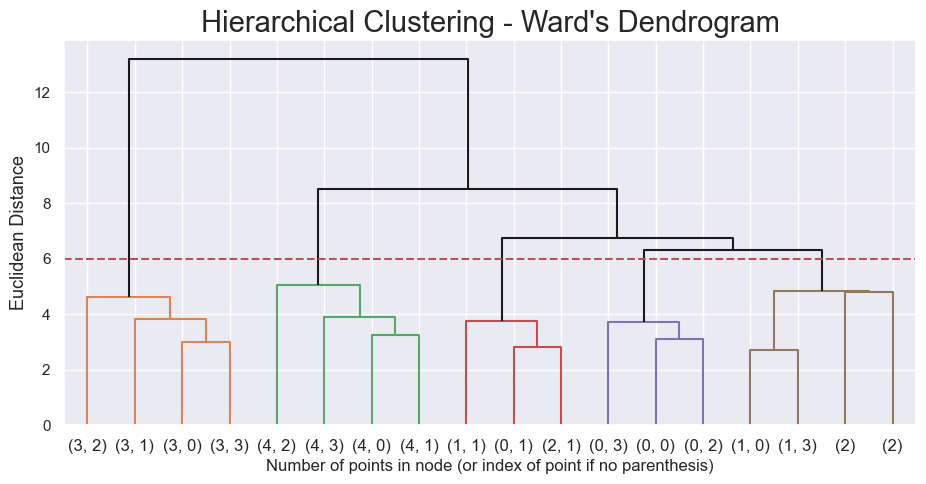

In [18]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(linkage=linkage, metric='euclidean', distance_threshold=0, n_clusters=None)

hclust_labels = hclust.fit_predict(df_centroids)

# Create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# The linkage matrix
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))
y_threshold = 6

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()


In [19]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids

prop_cui_cafe  prop_cui_chicken dishes  \
cuisine_labels behavior_labels                                           
0              0                     0.635799                -0.204340   
               1                     0.788712                -0.246116   
               2                    -0.118353                -0.253249   
               3                    -0.036406                -0.253249   
1              0                    -0.080863                -0.231699   
               1                    -0.028389                -0.246284   
               2                    -0.141285                -0.253249   
               3                    -0.165511                -0.253249   
2              0                    -0.076426                -0.205679   
               1                     0.011401                -0.225201   
               2                    -0.165511                -0.251249   
               3                    -0.159292                -0.253249   
3              0                    -0.131792                -0.184070   
               1                    -0.114717                -0.199314   
               2                    -0.165511                -0.253249   
               3                    -0.165511                -0.253249   
4              0                    -0.093252                 0.966206   
               1                     0.077629                 0.333782   
               2                    -0.145105                 0.594008   
               3                    -0.139683                -0.156869   

                                prop_cui_chinese  prop_cui_desserts  \
cuisine_labels behavior_labels                                        
0              0                       -0.217311           0.659403   
               1                       -0.207726           0.305157   
               2                       -0.247218           0.703900   
               3                       -0.252998           0.473492   
1              0                       -0.241826          -0.163443   
               1                       -0.229843          -0.178671   
               2                       -0.234610          -0.120650   
               3                       -0.257799          -0.159066   
2              0                        0.368968          -0.109820   
               1                        0.174369          -0.062821   
               2                       -0.023397          -0.059307   
               3                        0.022178          -0.131159   
3              0                       -0.225733          -0.174156   
               1                       -0.212163          -0.187486   
               2                       -0.270186          -0.194286   
               3                       -0.270186          -0.194286   
4              0                       -0.003808          -0.127097   
               1                        0.059559          -0.144977   
               2                       -0.119626          -0.181311   
               3                       -0.187207          -0.190344   

                                prop_cui_healthy  prop_cui_indian  \
cuisine_labels behavior_labels                                      
0              0                        0.740926        -0.237497   
               1                        0.623712        -0.251483   
               2                        0.678915        -0.278089   
               3                        0.023313        -0.280506   
1              0                       -0.151326        -0.227796   
               1                       -0.148958        -0.214013   
               2                       -0.141686        -0.273137   
               3                       -0.204096        -0.259571   
2              0                       -0.104615        -0.114160   
               1                       -0.081572        -0.114633   
            

In [20]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 4,
 (0, 1): 3,
 (0, 2): 4,
 (0, 3): 4,
 (1, 0): 2,
 (1, 1): 3,
 (1, 2): 2,
 (1, 3): 2,
 (2, 0): 2,
 (2, 1): 3,
 (2, 2): 2,
 (2, 3): 2,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 1,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 0,
 (4, 3): 0}

In [23]:
df_ = df_clustering.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['cuisine_labels'], row['behavior_labels'])
    ], axis=1
)

df_ [['cuisine_labels', 'behavior_labels', 'merged_labels']].head()

,cuisine_labels,behavior_labels,merged_labels
customer_id,,,
1b8f824d5e,3,0,1
f6d1b2ba63,1,0,2
180c632ed8,3,0,1
4eb37a6705,2,3,2
6aef2b6726,2,2,2


# 5. Cluster Analysis <a class="anchor" id="cluster_analysis"></a>
[Back to ToC](#toc)<br>

With the merged labels finalized, we can now begin the cluster analysis. In this section, we will examine key statistics, generate insightful plots, and delve deeper into the general behavior of each cluster.

In [33]:
# Merged cluster centroids
df_.groupby('merged_labels').mean(numeric_only=True)[cuisine_preferences + customer_behavior].T

merged_labels,0,1,2,3,4
prop_cui_cafe,-0.080385,-0.132753,-0.097637,0.157048,0.382125
prop_cui_chicken dishes,0.893765,-0.190657,-0.224298,-0.234911,-0.221745
prop_cui_chinese,-0.002429,-0.227820,0.088733,-0.007996,-0.228992
prop_cui_desserts,-0.130005,-0.176890,-0.120711,-0.019230,0.633880
prop_cui_healthy,-0.120553,-0.161515,-0.126028,0.042402,0.601175
prop_cui_indian,-0.156411,4.304722,-0.185944,-0.168084,-0.252377
prop_cui_japanese,-0.230521,-0.315412,0.196529,0.053523,-0.306294
prop_cui_noodle dishes,0.762208,-0.179729,-0.190921,-0.193796,-0.189272
prop_cui_thai,-0.091763,-0.120741,0.100880,0.010577,-0.193537
prop_cui_asian_origin,-0.662179,1.198315,0.384358,0.100261,-0.817694


## 5.1. Cluster Profilling <a class="anchor" id="cluster_profilling"></a>
[Back to 5. Cluster Analysis](#cluster_analysis)<br>

Let's start profiling each cluster.

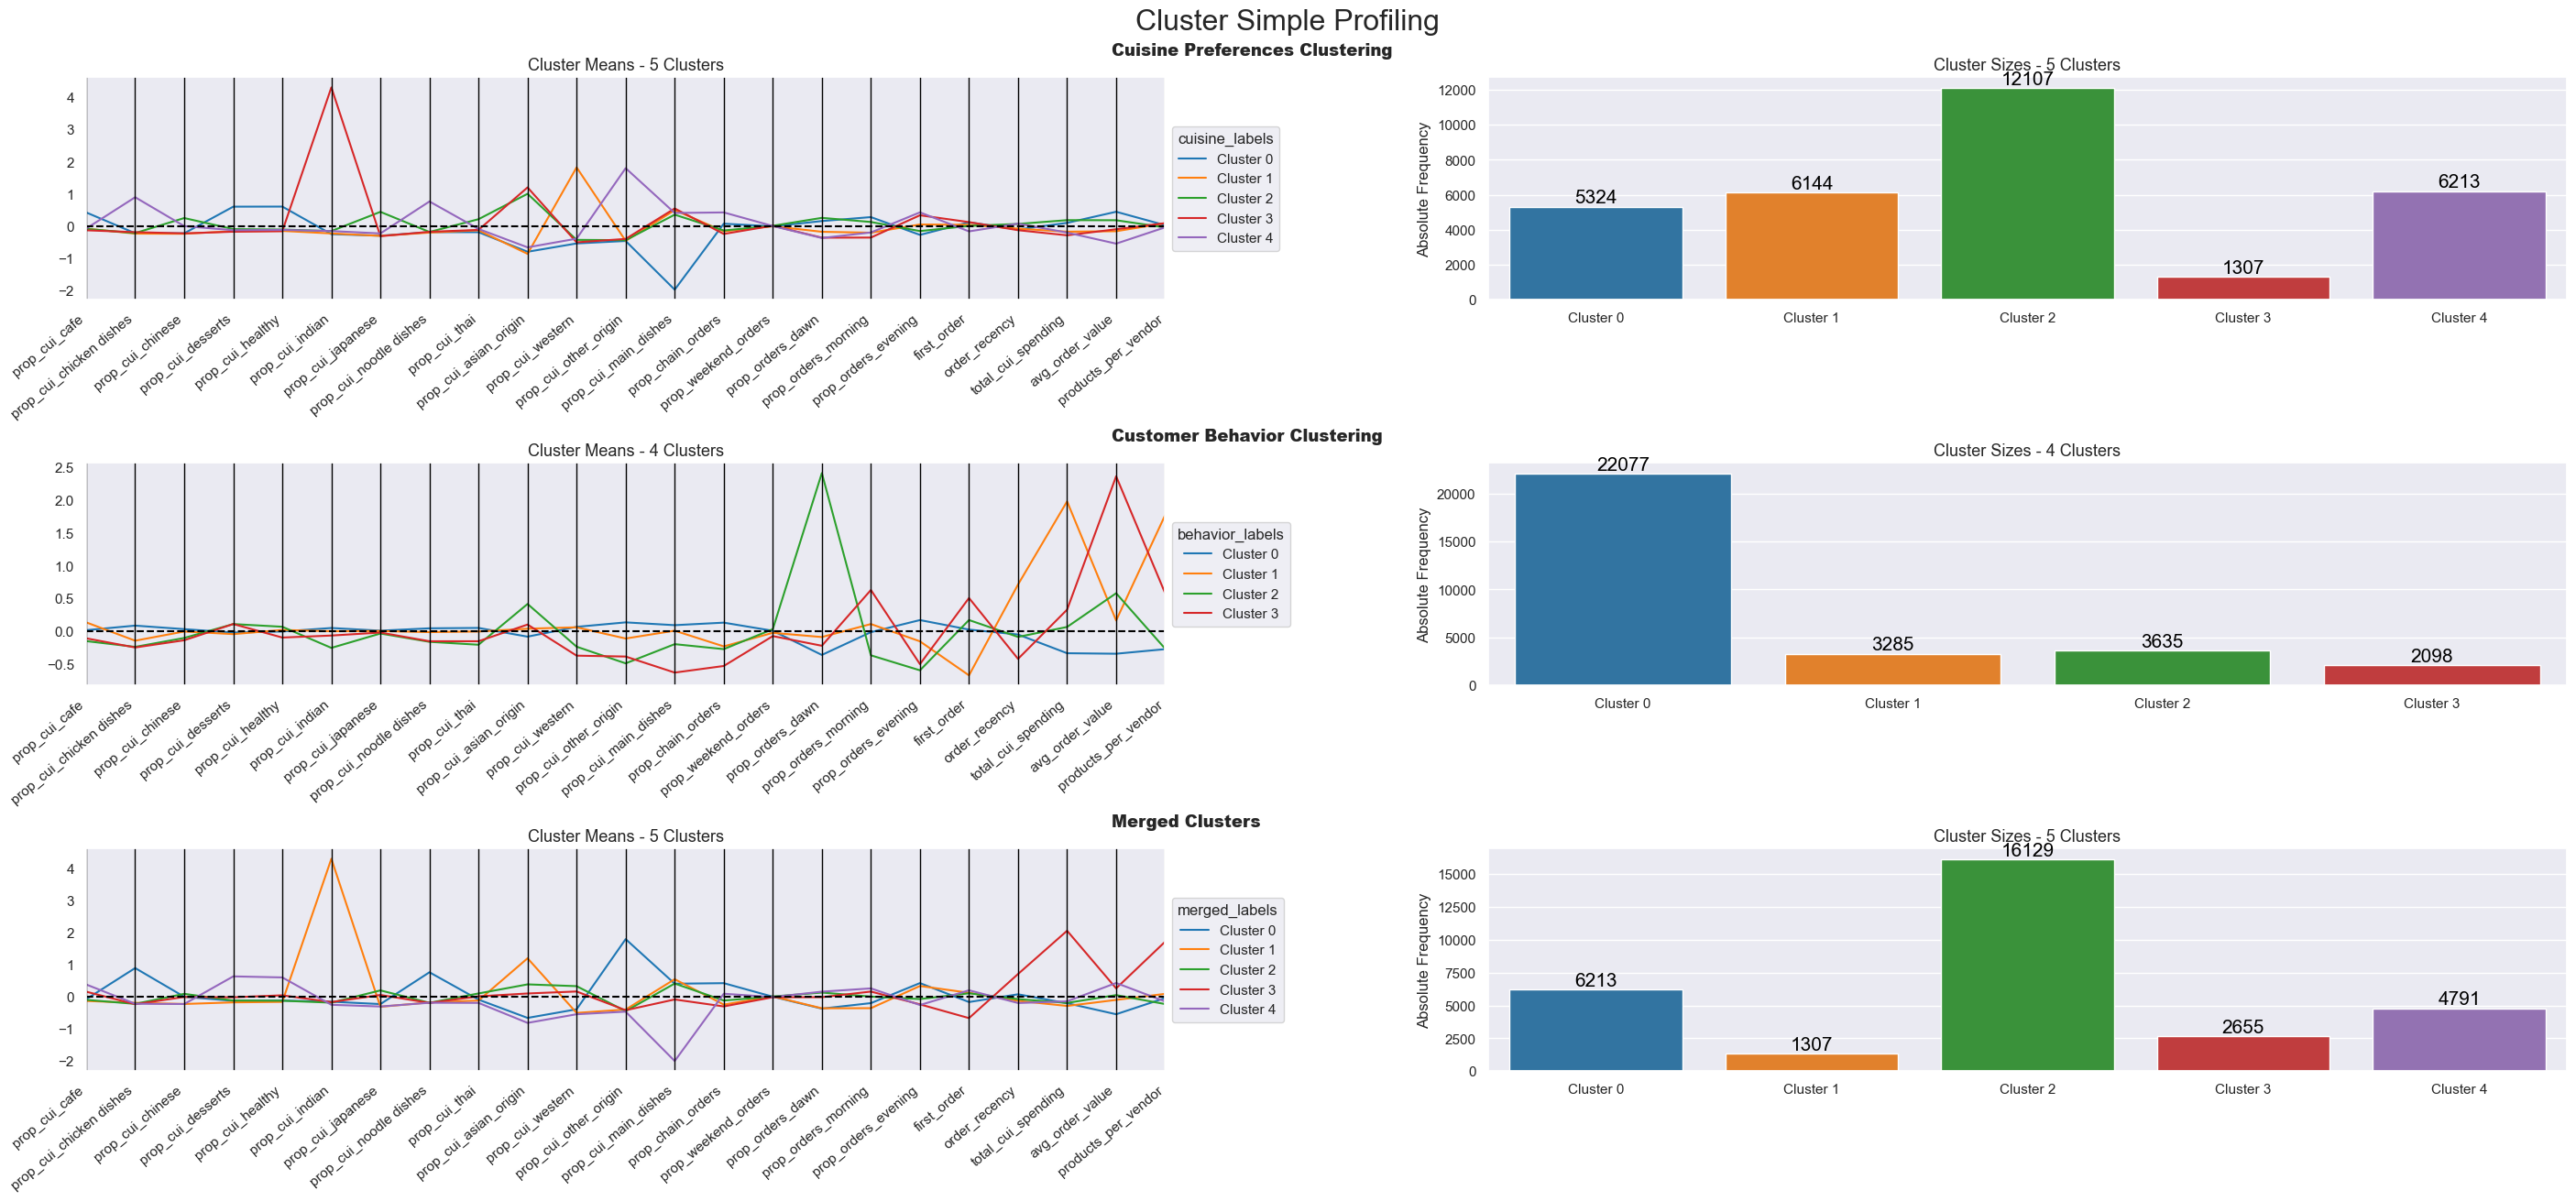

In [31]:
# Profiling each cluster (cuisine preferences, customer behavior, merged)
cluster_profiles(
    df = df_[cuisine_preferences + customer_behavior + ['cuisine_labels', 'behavior_labels', 'merged_labels']], 
    label_columns = ['cuisine_labels', 'behavior_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compare_titles = ["Cuisine Preferences Clustering", "Customer Behavior Clustering", "Merged Clusters"]
)

The dominant cluster could be the result of it representing an "average" customer, as this cluster may encompass the most common behaviors or characteristics in the dataset. However, to confirm this hypothesis, further exploration is needed to understand the underlying patterns and ensure that this dominance is not driven by other factors.

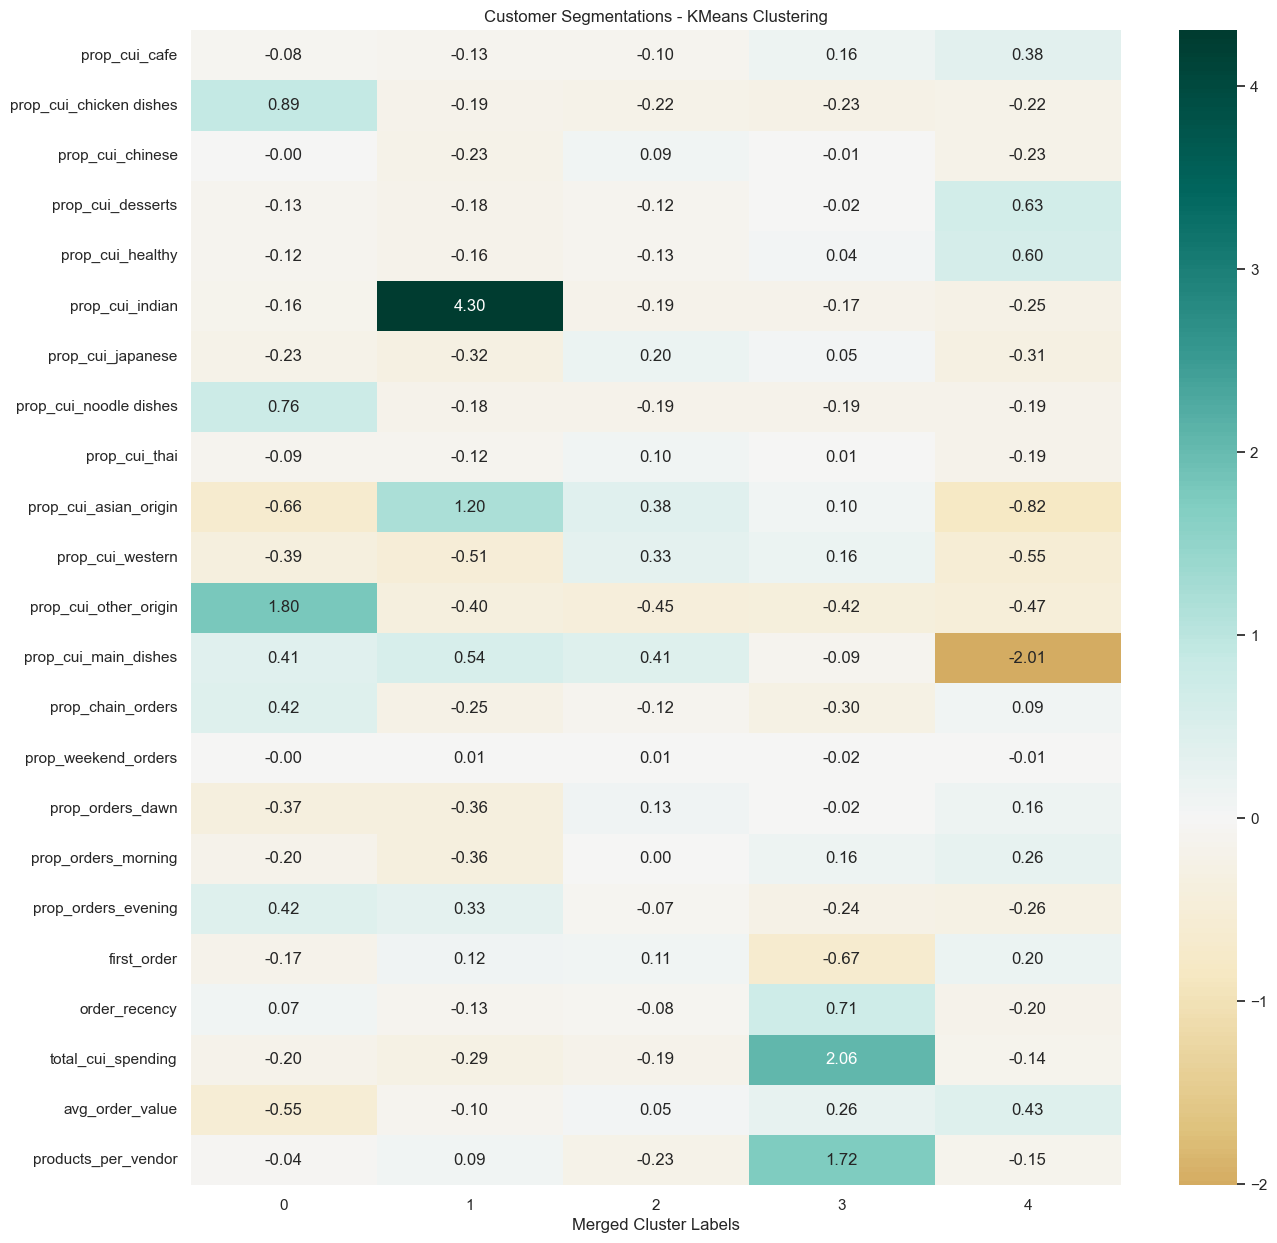

In [34]:
fig, ax = plt.subplots(figsize=(15,15))

km_profile = df_.groupby('merged_labels').mean(numeric_only=True)[cuisine_preferences + customer_behavior].T

sns.heatmap(km_profile,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax 
            )

ax.set_xlabel("Merged Cluster Labels")
ax.set_title("Customer Segmentations - KMeans Clustering")
plt.show()

In [42]:
df_.head().T

customer_id,1b8f824d5e,f6d1b2ba63,180c632ed8,4eb37a6705,6aef2b6726
customer_region,2360,4660,4660,4660,8670
customer_age,-1.366137,1.481241,-0.227186,-1.0814,1.765979
vendor_count,-0.404103,-0.77418,-0.404103,-0.404103,-0.404103
product_count,-0.084407,-0.564201,-0.40427,-0.084407,-0.564201
chain_orders,-0.474819,-0.208274,-0.474819,-0.741365,-0.741365
...,...,...,...,...,...
prop_orders_evening,2.639351,-0.630631,-0.630631,-0.630631,-0.630631
products_per_vendor,0.817727,0.283289,-0.25115,0.817727,-0.785589
cuisine_labels,3,1,3,2,2
behavior_labels,0,0,0,3,2


In [365]:
df_.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American',
       ...
       'prop_weekend_orders', 'prop_weekday_orders', 'prop_orders_dawn',
       'prop_orders_morning', 'prop_orders_afternoon', 'prop_orders_evening',
       'products_per_vendor', 'cuisine_labels', 'behavior_labels',
       'merged_labels'],
      dtype='object', length=104)

In [366]:
df_.groupby('merged_labels').mean(numeric_only=True)[cuisine_preferences + customer_behavior]

,prop_cui_cafe,prop_cui_chicken dishes,prop_cui_chinese,prop_cui_desserts,prop_cui_healthy,prop_cui_indian,prop_cui_japanese,prop_cui_noodle dishes,prop_cui_thai,prop_cui_asian_origin,...,prop_chain_orders,prop_weekend_orders,prop_orders_dawn,prop_orders_morning,prop_orders_evening,first_order,order_recency,total_cui_spending,avg_order_value,products_per_vendor
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,-0.080385,0.893765,-0.002429,-0.130005,-0.120553,-0.156411,-0.230521,0.762208,-0.091763,-0.662179,...,0.422270,-0.000482,-0.372498,-0.200392,0.424242,-0.166853,0.074675,-0.203848,-0.547587,-0.040648
1,-0.132753,-0.190657,-0.227820,-0.176890,-0.161515,4.304722,-0.315412,-0.179729,-0.120741,1.198315,...,-0.246391,0.008836,-0.361804,-0.358674,0.334126,0.121094,-0.129766,-0.288746,-0.100557,0.088498
2,-0.097637,-0.224298,0.088733,-0.120711,-0.126028,-0.185944,0.196529,-0.190921,0.100880,0.384358,...,-0.120230,0.005806,0.128712,0.003040,-0.073881,0.105215,-0.076082,-0.193767,0.049230,-0.229832
3,0.157048,-0.234911,-0.007996,-0.019230,0.042402,-0.168084,0.053523,-0.193796,0.010577,0.100261,...,-0.303701,-0.017379,-0.015287,0.159906,-0.239122,-0.668387,0.707590,2.057486,0.260341,1.718201
4,0.382125,-0.221745,-0.228992,0.633880,0.601175,-0.252377,-0.306294,-0.189272,-0.193537,-0.817694,...,0.092670,-0.011701,0.156919,0.258870,-0.260074,0.199529,-0.197428,-0.144743,0.427543,-0.149862


To better understand how the cuisines behave in different merged_labels we can asses to the  cui_ features and print out the mean per cluster.

In [122]:
# Load the dataset
df_clustering_non_standardized = pd.read_csv('../Data/df_clustering_non_standardized.csv', index_col=0)

# Check the first few rows to confirm the dataset is loaded correctly
df_clustering_non_standardized.head()


,customer_region,customer_age,vendor_count,product_count,chain_orders,first_order,last_order,last_promo,payment_method,CUI_American,...,prop_cui_main_dishes,prop_cui_snacks_beverages,prop_chain_orders,prop_weekend_orders,prop_weekday_orders,prop_orders_dawn,prop_orders_morning,prop_orders_afternoon,prop_orders_evening,products_per_vendor
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,...,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,2.5
f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,...,1.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0,1.5
4eb37a6705,4660,20,2,5,0,0,2,NOPROMO,DIGI,14.57,...,1.0,0.0,0.0,0.5,0.5,0.0,1.0,0.0,0.0,2.5
6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,...,1.0,0.0,0.0,0.5,0.5,1.0,0.0,0.0,0.0,1.0


In [124]:
# Merge cuisine_labels and behavior_labels from df_clustering to df_clustering_non_standardized based on the index
df_clustering_non_standardized = df_clustering_non_standardized.merge(
    df_clustering[['cuisine_labels', 'behavior_labels']], 
    left_index=True, 
    right_index=True,
    how='left'  # or 'inner' depending on whether you want to keep all rows or only matched rows
)

# Check the first few rows of the updated DataFrame
df_clustering_non_standardized.head()

,customer_region,customer_age,vendor_count,product_count,chain_orders,first_order,last_order,last_promo,payment_method,CUI_American,...,prop_chain_orders,prop_weekend_orders,prop_weekday_orders,prop_orders_dawn,prop_orders_morning,prop_orders_afternoon,prop_orders_evening,products_per_vendor,cuisine_labels,behavior_labels
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,...,0.5,1.0,0.0,0.0,0.0,0.0,1.0,2.5,3,0
f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,9.20,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0
180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,...,0.5,0.5,0.5,0.0,0.5,0.5,0.0,1.5,3,0
4eb37a6705,4660,20,2,5,0,0,2,NOPROMO,DIGI,14.57,...,0.0,0.5,0.5,0.0,1.0,0.0,0.0,2.5,2,3
6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,...,0.0,0.5,0.5,1.0,0.0,0.0,0.0,1.0,2,2


In [125]:
# Mapping the hierarchical clusters on the centroids to the observations
df_clustering_non_standardized['merged_labels'] = df_clustering_non_standardized.apply(
    lambda row: cluster_mapper[
        (row['cuisine_labels'], row['behavior_labels'])
    ], axis=1
)

In [126]:
metric_features = df_clustering_non_standardized.select_dtypes(include=['number']).columns.tolist()

In [127]:
# exclude the following columns from the metric_features list: 'behavior_labels','city','cuisine_labels','customer_region','merged_labels'
metric_features = [feature for feature in metric_features if feature not in ['behavior_labels','city','cuisine_labels','customer_region','merged_labels']]

In [137]:
#Get the list with the cui columns
prop_cui_columns = [col for col in df_clustering_non_standardized.columns if "prop_cui" in col.lower()]

['prop_cui_american',
 'prop_cui_asian',
 'prop_cui_beverages',
 'prop_cui_cafe',
 'prop_cui_chicken dishes',
 'prop_cui_chinese',
 'prop_cui_desserts',
 'prop_cui_healthy',
 'prop_cui_indian',
 'prop_cui_italian',
 'prop_cui_japanese',
 'prop_cui_noodle dishes',
 'prop_cui_other',
 'prop_cui_street food / snacks',
 'prop_cui_thai',
 'prop_cui_asian_origin',
 'prop_cui_western',
 'prop_cui_other_origin',
 'prop_cui_main_dishes',
 'prop_cui_snacks_beverages']

In [138]:
# Calculate the overall mean for each CUI column
overall_avg = df_clustering_non_standardized[prop_cui_columns].mean()

# Group by 'merged_labels' and get the mean for each CUI column
grouped_means = df_clustering_non_standardized.groupby('merged_labels')[prop_cui_columns].mean().T

# Add the overall averages as a new column
grouped_means['Overall_Avg'] = overall_avg

# Display the final result
grouped_means

merged_labels,0,1,2,3,4,Overall_Avg
prop_cui_american,0.064834,0.031144,0.208355,0.142292,0.038965,0.140490
prop_cui_asian,0.035544,0.016969,0.324000,0.265417,0.055349,0.207065
prop_cui_beverages,0.035072,0.009439,0.023536,0.047814,0.297586,0.069546
prop_cui_cafe,0.007833,0.003014,0.006245,0.029680,0.050390,0.015229
prop_cui_chicken dishes,0.165213,0.009016,0.004170,0.002641,0.004538,0.036477
prop_cui_chinese,0.041561,0.006576,0.055711,0.040697,0.006394,0.041938
prop_cui_desserts,0.007358,0.001991,0.008422,0.020039,0.094801,0.022240
prop_cui_healthy,0.010273,0.005236,0.009600,0.030312,0.099024,0.025098
prop_cui_indian,0.022388,0.827219,0.017060,0.020282,0.005075,0.050606
prop_cui_italian,0.036508,0.030837,0.144344,0.152637,0.008440,0.097795


In [139]:
#Get the list with the cui columns
order_columns = [col for col in df_clustering_non_standardized.columns if "order" in col.lower()]
order_columns

['chain_orders',
 'first_order',
 'last_order',
 'total_orders',
 'weekend_orders',
 'weekday_orders',
 'orders_dawn',
 'orders_morning',
 'orders_afternoon',
 'orders_evening',
 'order_recency',
 'avg_daily_orders',
 'avg_order_value',
 'prop_chain_orders',
 'prop_weekend_orders',
 'prop_weekday_orders',
 'prop_orders_dawn',
 'prop_orders_morning',
 'prop_orders_afternoon',
 'prop_orders_evening']

In [140]:
# Calculate the overall mean for each order_columns
overall_avg = df_clustering_non_standardized[order_columns].mean()

# Group by 'merged_labels' and get the mean for each order_columns
grouped_means = df_clustering_non_standardized.groupby('merged_labels')[order_columns].mean().T

# Add the overall averages as a new column
grouped_means['Overall_Avg'] = overall_avg

# Display the final result
grouped_means

merged_labels,0,1,2,3,4,Overall_Avg
chain_orders,4.298728,1.967100,1.964412,6.183804,1.900647,2.781380
first_order,24.368743,31.305279,30.922748,12.287006,33.194740,28.388165
last_order,65.400451,60.661821,61.906132,80.070433,59.093509,63.669593
total_orders,5.417673,3.414690,3.219046,11.335217,2.757044,4.288374
weekend_orders,1.562369,0.969396,0.936884,3.246704,0.791275,1.238013
weekday_orders,3.855303,2.445295,2.282163,8.088512,1.965769,3.050362
orders_dawn,0.082730,0.067330,0.441689,1.163089,0.412857,0.411384
orders_morning,1.226461,0.591431,0.864344,3.780791,0.978919,1.191896
orders_afternoon,2.400290,1.674828,1.270693,4.765348,0.975579,1.766297
orders_evening,1.672783,1.047437,0.605493,1.532957,0.364642,0.879402


## 6.2. Profiling with Demographic features 

In [141]:
# Ensure that loaded_categories['demographics'] and loaded_categories['categorical'] are valid lists of column names
demographics = loaded_categories['demographics']

# Apply mode() and handle the case of multiple modes per group for combined columns
mode_df = df_clustering_non_standardized.groupby('merged_labels')[demographics].agg(lambda x: x.mode().iloc[0]).T

mode_df

merged_labels,0,1,2,3,4
customer_region,2360,4660,8670,4660,8670
city,2,4,8,4,8
generation,Millennials,Millennials,Millennials,Millennials,Millennials
customer_age,26,26,26,26,26
last_promo,NOPROMO,NOPROMO,NOPROMO,NOPROMO,NOPROMO
payment_method,CARD,CARD,CARD,CARD,CARD
promo_used,0,1,0,0,1


### 6.1.1 Customer Region

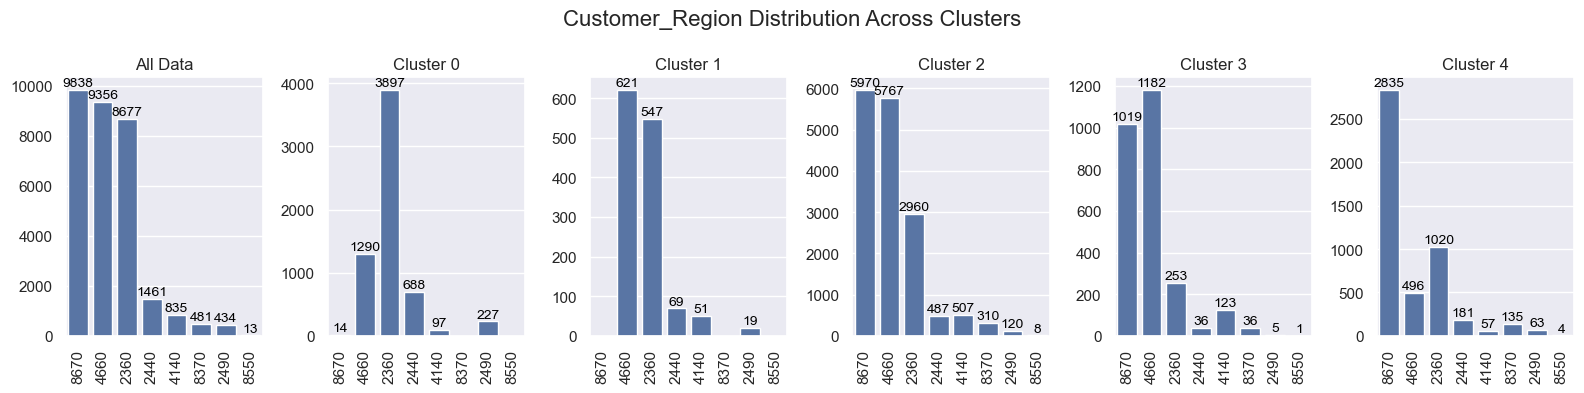

In [164]:
plot_demographics_distribution(df_clustering_non_standardized,'customer_region')

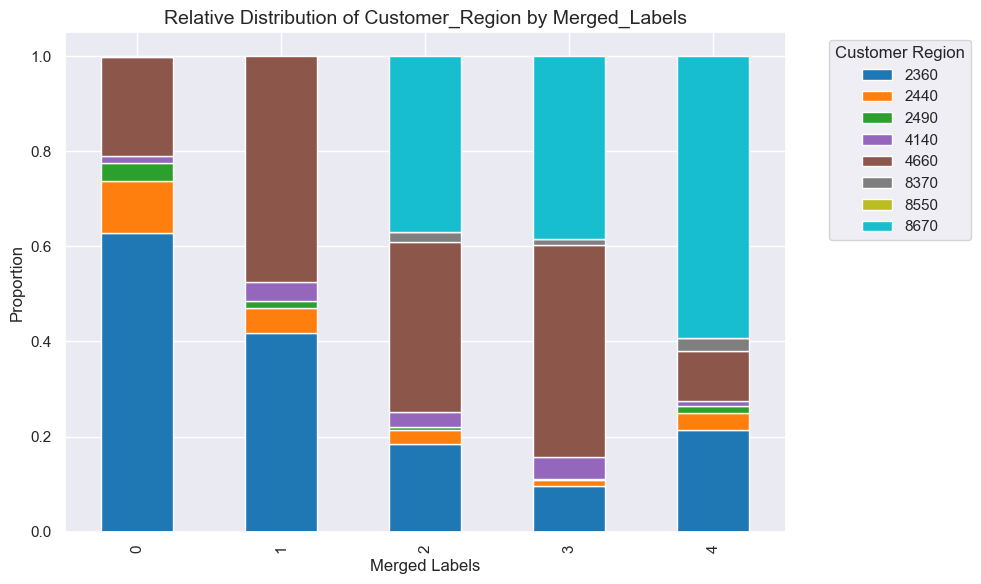

In [165]:
plot_demographics_relative_distribution(df_clustering_non_standardized, 'customer_region')

### 6.1.2 Cities

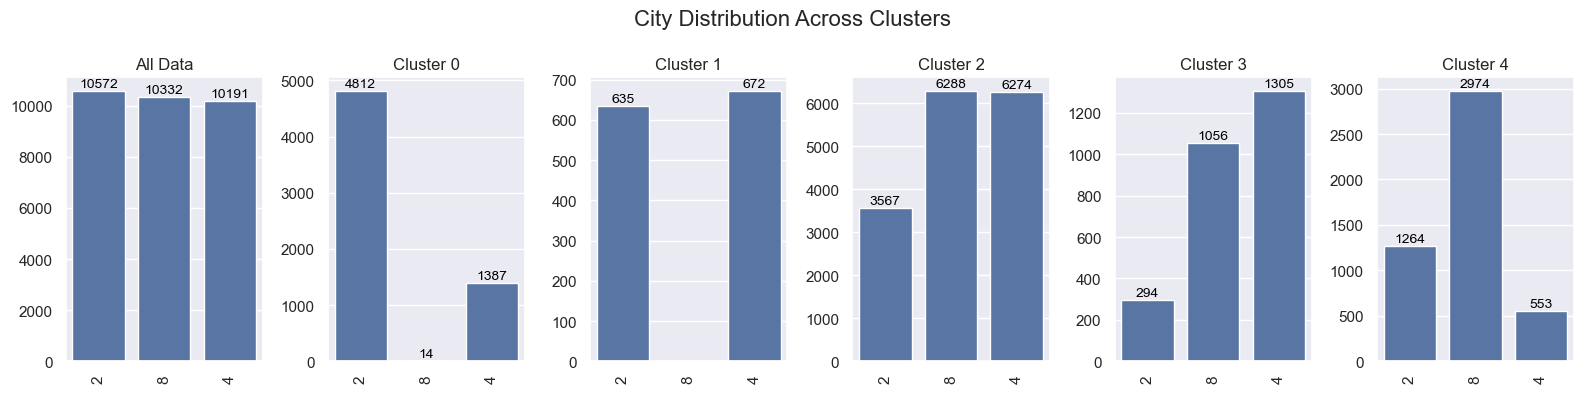

In [166]:
plot_demographics_distribution(df_clustering_non_standardized, 'city')

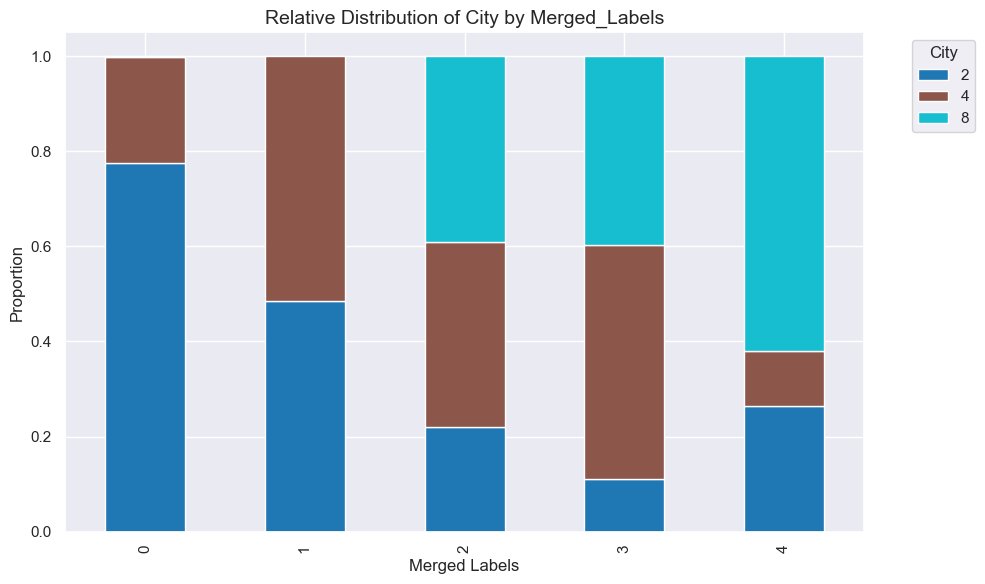

In [146]:
plot_demographics_relative_distribution(df_clustering_non_standardized, 'city')

### 6.1.3 Customer Age

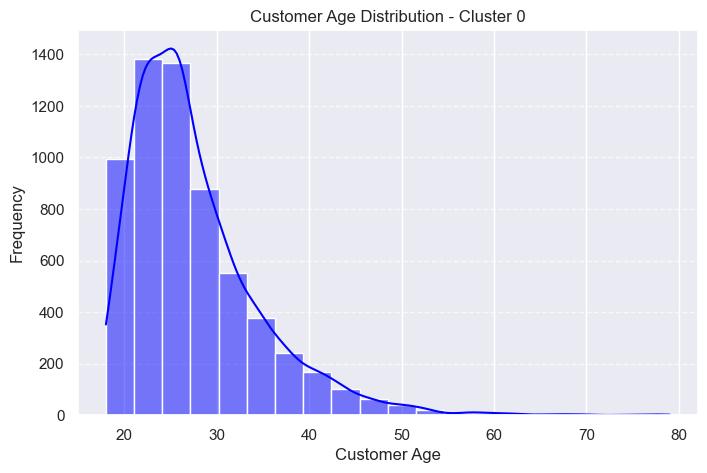

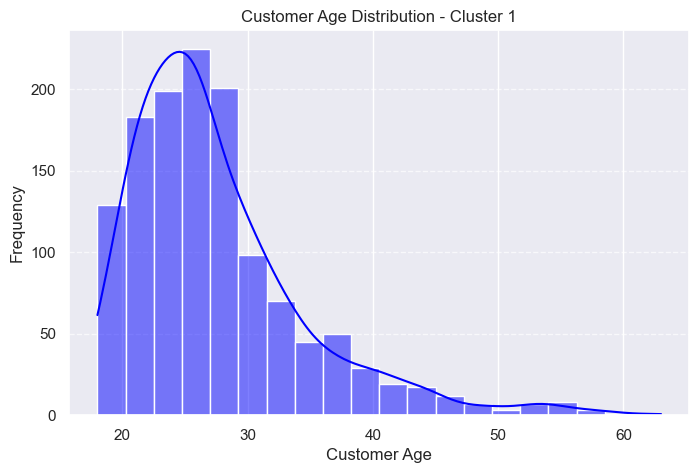

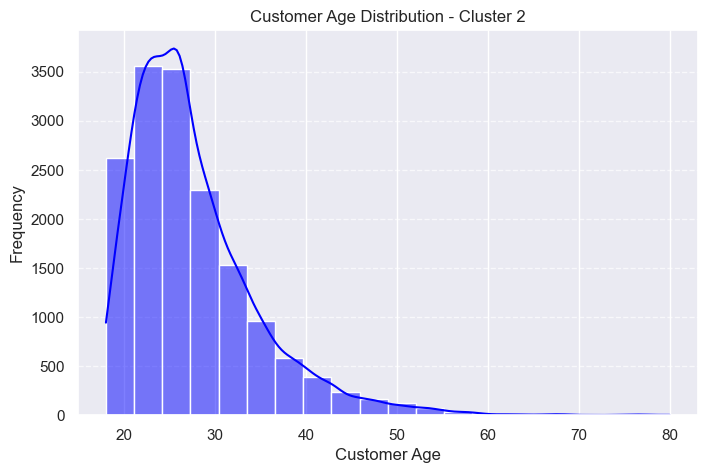

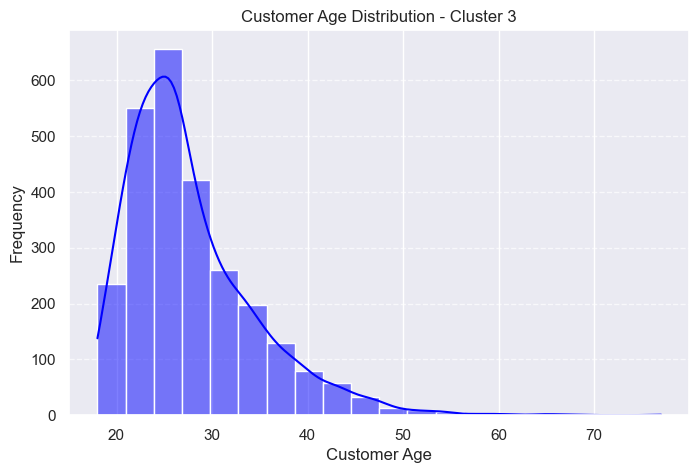

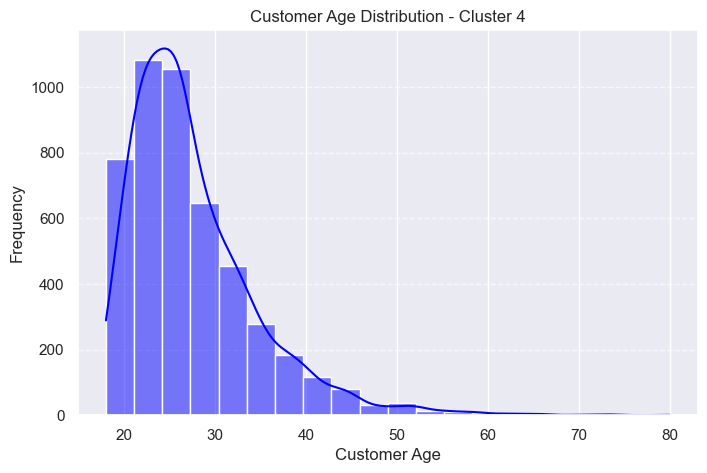

In [174]:
plot_customer_age_distribution(df_clustering_non_standardized)

We can also check the min and the maximum value per cluster solution.

In [176]:
#check the min and max ustomer age per merged_labels
df_clustering_non_standardized.groupby('merged_labels')['customer_age'].agg(['min', 'max'])

,min,max
merged_labels,,
0,18,79
1,18,63
2,18,80
3,18,77
4,18,80


In [175]:
# df_clustering_non_standardized.to_csv('../Data/df_clustering_non_standardized_mergedlabel.csv', index=True)

### 6.1.4 Generation

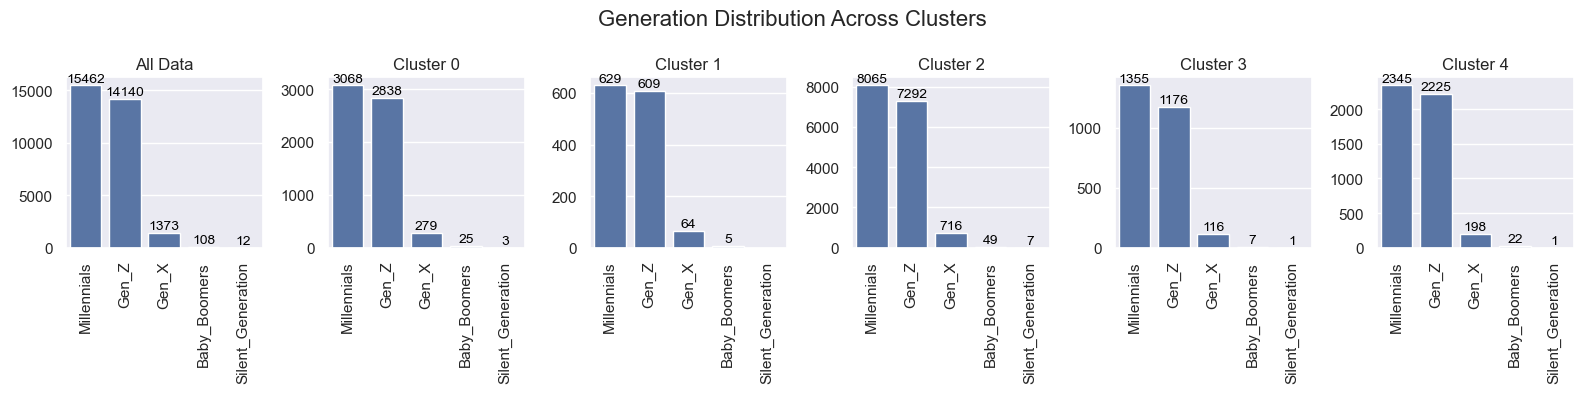

In [177]:
plot_demographics_distribution(df_clustering_non_standardized, 'generation')

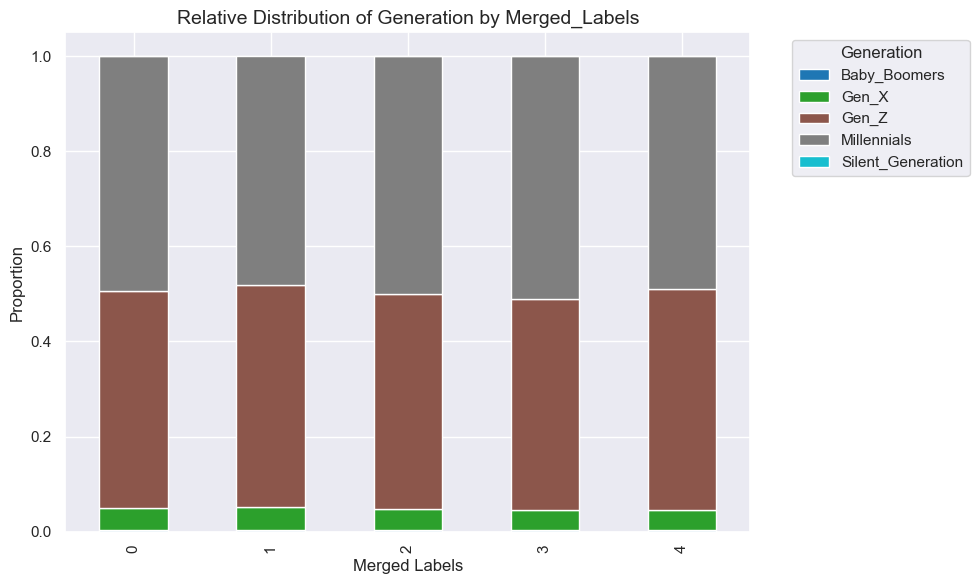

In [149]:
plot_demographics_relative_distribution(df_clustering_non_standardized, 'generation')

### 6.1.5 Last Promo

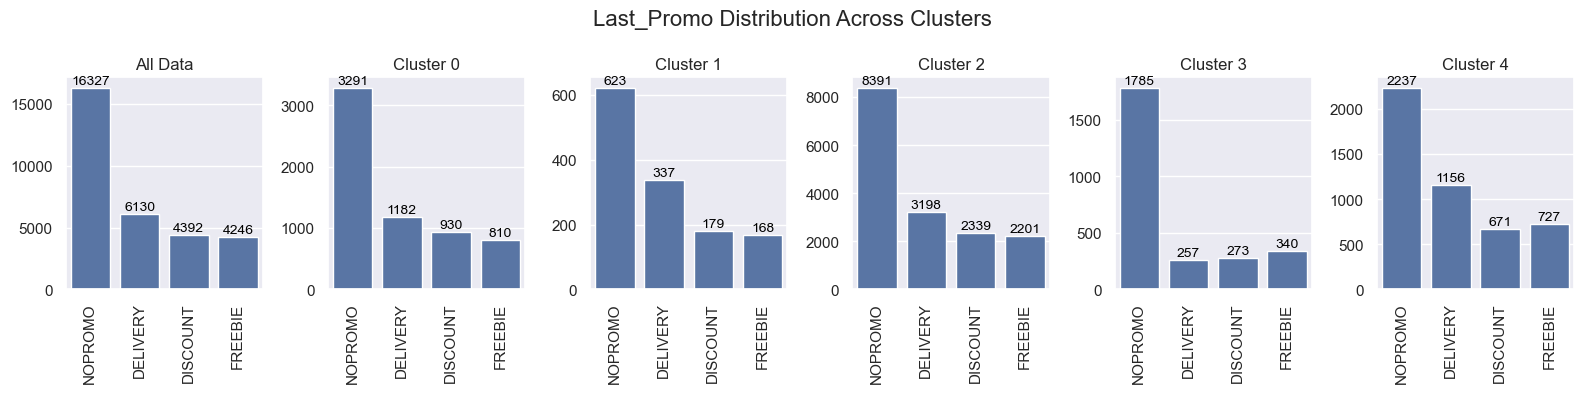

In [179]:
plot_demographics_distribution(df_clustering_non_standardized, "last_promo")

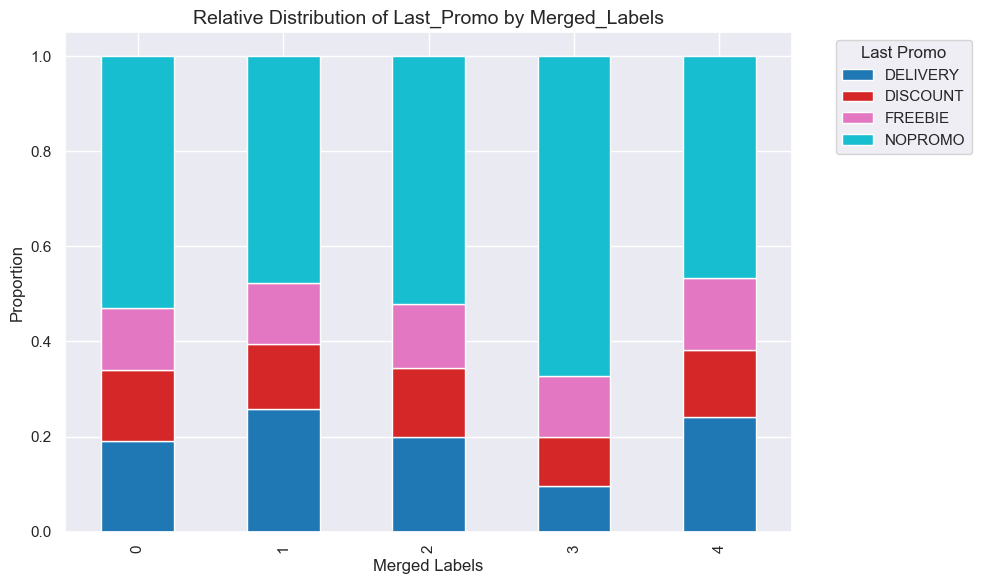

In [180]:
plot_demographics_relative_distribution(df_clustering_non_standardized, "last_promo")

### 6.1.6 Promo Used

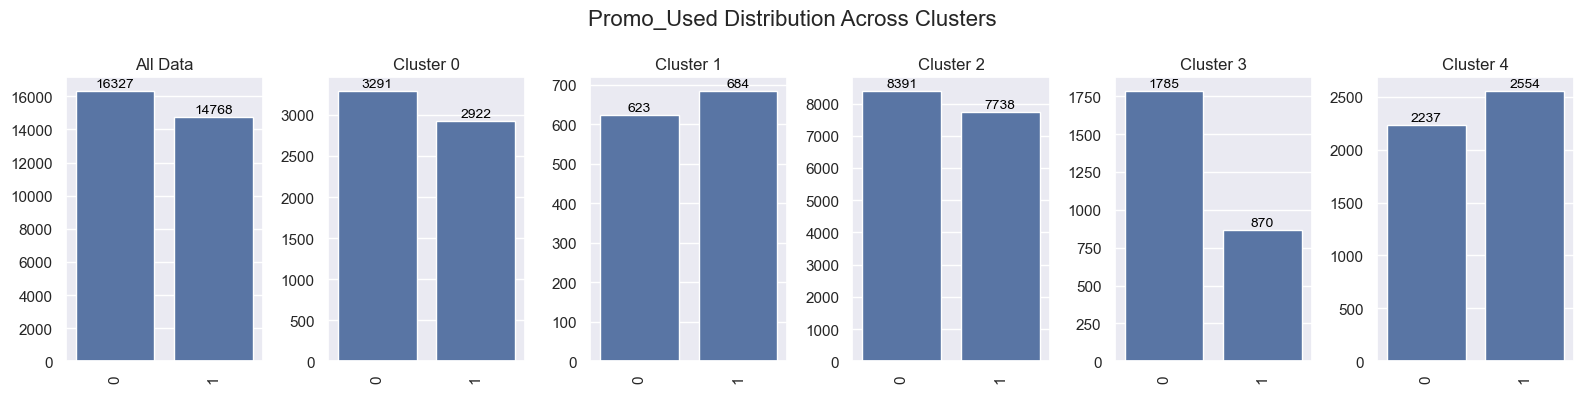

In [181]:
plot_demographics_distribution(df_clustering_non_standardized, "promo_used")

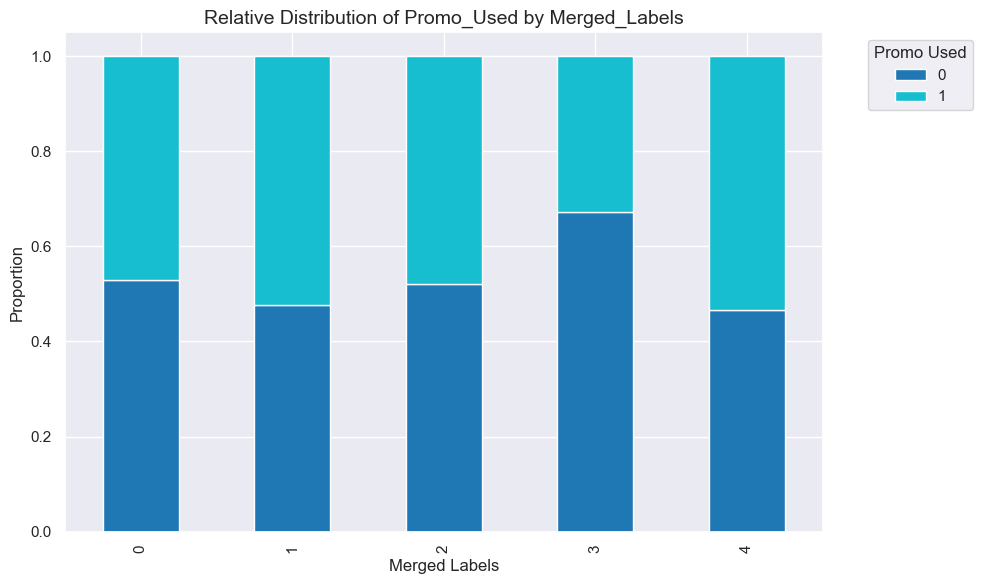

In [182]:
plot_demographics_relative_distribution(df_clustering_non_standardized, "promo_used")

### 6.1.7 Payment Method

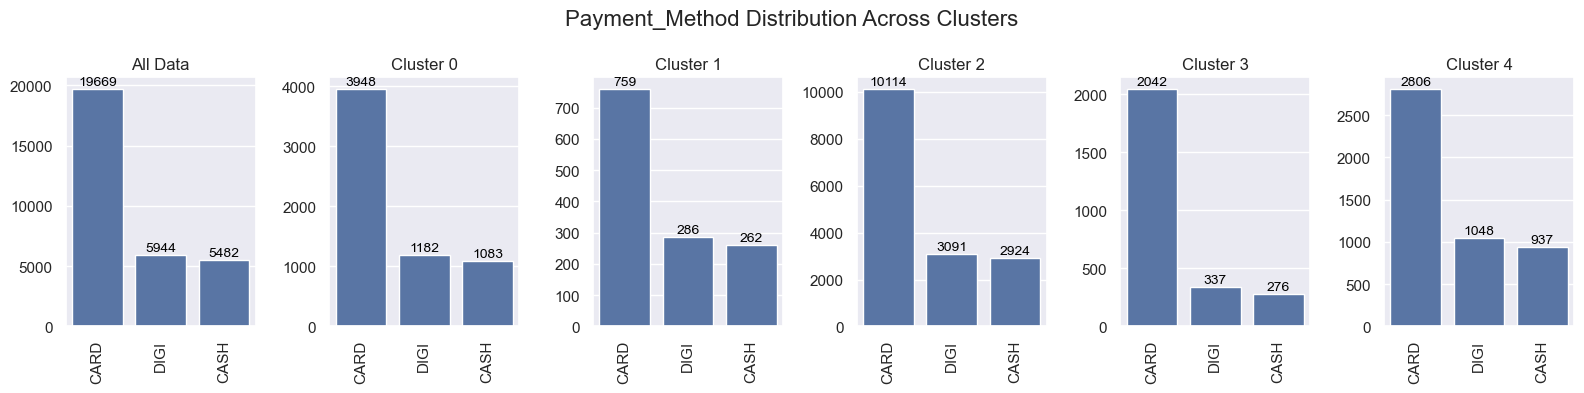

In [183]:
plot_demographics_distribution(df_clustering_non_standardized, "payment_method")

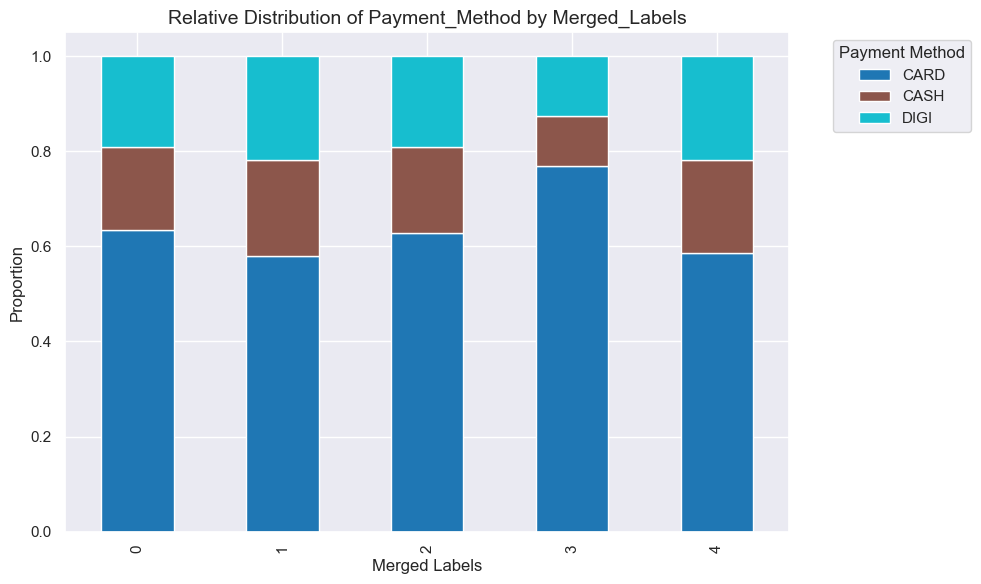

In [184]:
plot_demographics_relative_distribution(df_clustering_non_standardized, "payment_method")

## 6.2 Cluster Visualizations

In [185]:
df_profiling[metric_features] = scaler.transform(df_profiling[metric_features])

In [387]:
cluster_vis_features = loaded_categories['cuisine_preferences'] + loaded_categories['customer_behavior']
cluster_vis_features = cluster_vis_features + ['merged_labels']
df_cluster_visualization = df_profiling[cluster_vis_features]

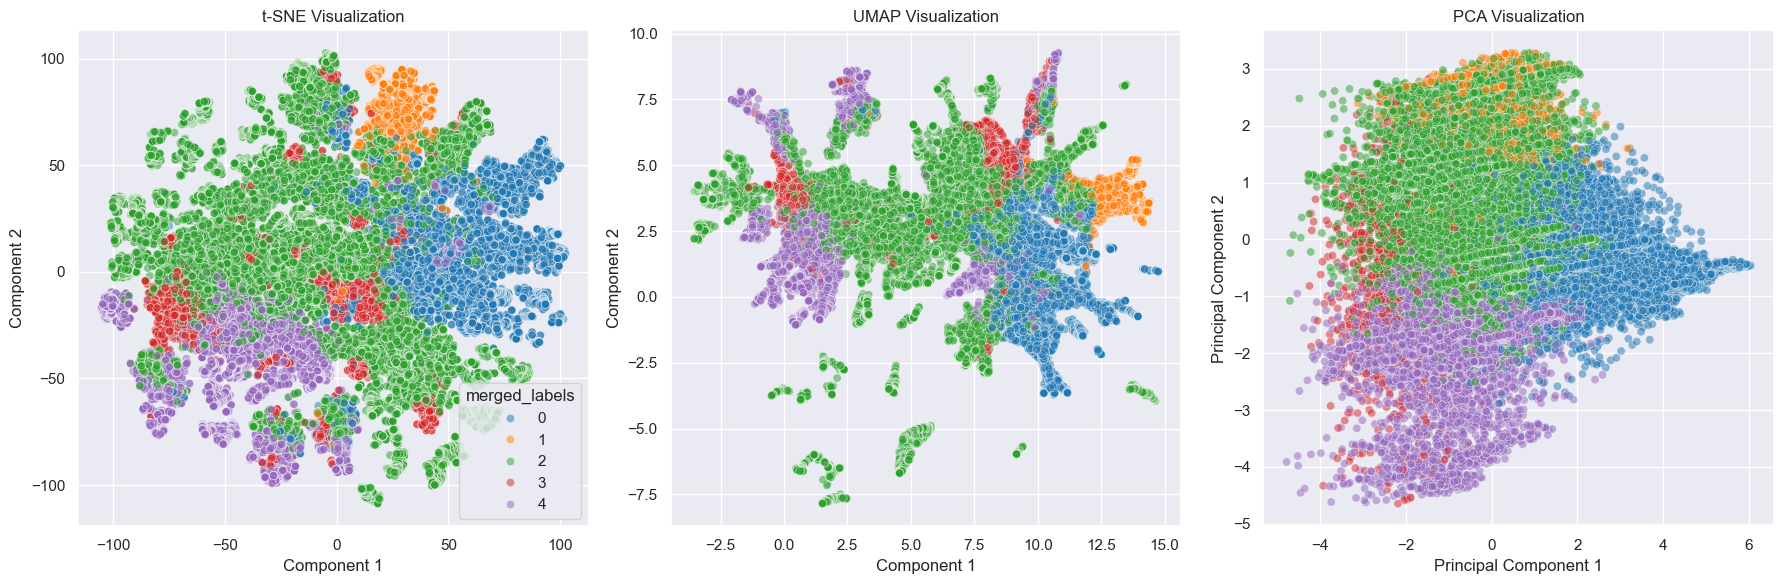

In [388]:
plot_dim_reduction(df_cluster_visualization, 'merged_labels')

# 7. Reclassify Outliers <a class="anchor" id="reclassify_outliers"></a>
[Back to ToC](#toc)<br>

Reintroduce outliers and predict their cluster belonging using DecisionTrees

In [389]:
df_feature_importance = df_profiling.copy()

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Preparing the data
X = df_feature_importance[cuisine_preferences + customer_behavior]
y = df_feature_importance.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 88.81% of the customers correctly


In [391]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

prop_cui_other_origin      0.440043
prop_cui_main_dishes       0.392581
prop_cui_indian            0.140283
total_cui_spending         0.025235
prop_cui_asian_origin      0.001859
prop_chain_orders          0.000000
avg_order_value            0.000000
order_recency              0.000000
first_order                0.000000
prop_orders_evening        0.000000
prop_orders_morning        0.000000
prop_orders_dawn           0.000000
prop_weekend_orders        0.000000
prop_cui_cafe              0.000000
prop_cui_chicken dishes    0.000000
prop_cui_western           0.000000
prop_cui_thai              0.000000
prop_cui_noodle dishes     0.000000
prop_cui_japanese          0.000000
prop_cui_healthy           0.000000
prop_cui_desserts          0.000000
prop_cui_chinese           0.000000
products_per_vendor        0.000000
dtype: float64

In [392]:
df_outliers = pd.read_csv("../Data/df_final_outliers.csv", index_col="customer_id")

In [393]:
scaler = StandardScaler()
df_outliers_scaled = df_outliers.copy()
# Normalize the data but only for the features used in clustering
df_outliers_scaled[cuisine_preferences + customer_behavior] = scaler.fit_transform(df_outliers[cuisine_preferences + customer_behavior])

In [394]:
df_outliers_scaled[cuisine_preferences + customer_behavior].head()

,prop_cui_cafe,prop_cui_chicken dishes,prop_cui_chinese,prop_cui_desserts,prop_cui_healthy,prop_cui_indian,prop_cui_japanese,prop_cui_noodle dishes,prop_cui_thai,prop_cui_asian_origin,...,prop_chain_orders,prop_weekend_orders,prop_orders_dawn,prop_orders_morning,prop_orders_evening,first_order,order_recency,total_cui_spending,avg_order_value,products_per_vendor
customer_id,,,,,,,,,,,,,,,,,,,,,
7b0661a6ba,-0.238856,-0.160526,-0.280846,-0.153006,-0.194404,5.083814,-0.301241,-0.138449,-0.23367,1.641101,...,1.589209,0.401084,-0.441438,0.901892,-0.178993,-0.702982,-2.366468,-1.227550,-1.070071,1.054683
249ba584d3,-0.158254,-0.160526,-0.280846,-0.153006,-0.194404,-0.254766,-0.301241,-0.138449,-0.23367,1.609662,...,-0.658721,-0.068022,-0.441438,-0.855825,-0.518361,-0.702982,-0.527331,3.172871,-0.398420,1.604477
61327c3c6c,3.187020,-0.160526,-0.280846,-0.153006,-0.194404,-0.123498,0.346508,-0.138449,-0.23367,0.006435,...,0.646754,0.515190,-0.441438,0.166104,0.725987,-0.702982,-0.264597,0.891892,-0.692646,-0.681508
0df875b8cf,-0.238856,-0.160526,-0.280846,-0.153006,-0.194404,-0.254766,0.063817,-0.138449,-0.23367,-0.759433,...,-1.049665,0.515190,-0.441438,-0.643263,1.744091,-0.702982,-0.001863,-0.680347,-0.873162,0.418080
f11fd892ac,-0.238856,-0.160526,-0.033177,-0.153006,3.120096,-0.254766,-0.141384,-0.138449,-0.23367,-0.156357,...,-0.090074,0.867884,0.986993,0.507242,-0.518361,-0.702982,0.063820,0.911096,-0.533444,-0.926890


In [395]:
# Predicting the cluster labels of the outliers
df_outliers_scaled['merged_labels'] = dt.predict(df_outliers_scaled[cuisine_preferences + customer_behavior])
df_outliers_scaled.head()

,customer_region,customer_age,vendor_count,product_count,chain_orders,first_order,last_order,last_promo,payment_method,CUI_American,...,prop_cui_snacks_beverages,prop_chain_orders,prop_weekend_orders,prop_weekday_orders,prop_orders_dawn,prop_orders_morning,prop_orders_afternoon,prop_orders_evening,products_per_vendor,merged_labels
customer_id,,,,,,,,,,,,,,,,,,,,,
7b0661a6ba,2360,30,1,19,14,-0.702982,43,FREEBIE,CARD,0.00,...,0.000000,1.589209,0.401084,0.642857,-0.441438,0.901892,0.285714,-0.178993,1.054683,1
249ba584d3,4660,34,4,95,8,-0.702982,71,NOPROMO,CARD,0.00,...,0.010002,-0.658721,-0.068022,0.740741,-0.441438,-0.855825,0.925926,-0.518361,1.604477,2
61327c3c6c,4660,39,16,64,27,-0.702982,75,NOPROMO,CARD,13.01,...,0.425102,0.646754,0.515190,0.619048,-0.441438,0.166104,0.333333,0.725987,-0.681508,2
0df875b8cf,4140,21,2,27,0,-0.702982,79,NOPROMO,CARD,0.00,...,0.000000,-1.049665,0.515190,0.619048,-0.441438,-0.643263,0.380952,1.744091,0.418080,2
f11fd892ac,8670,26,25,47,12,-0.702982,80,DELIVERY,CARD,12.77,...,0.413334,-0.090074,0.867884,0.545455,0.986993,0.507242,0.151515,-0.518361,-0.926890,2


In [396]:
df_outliers_scaled['merged_labels'].value_counts()

merged_labels
2    80
4    35
0    20
1     5
3     1
Name: count, dtype: int64

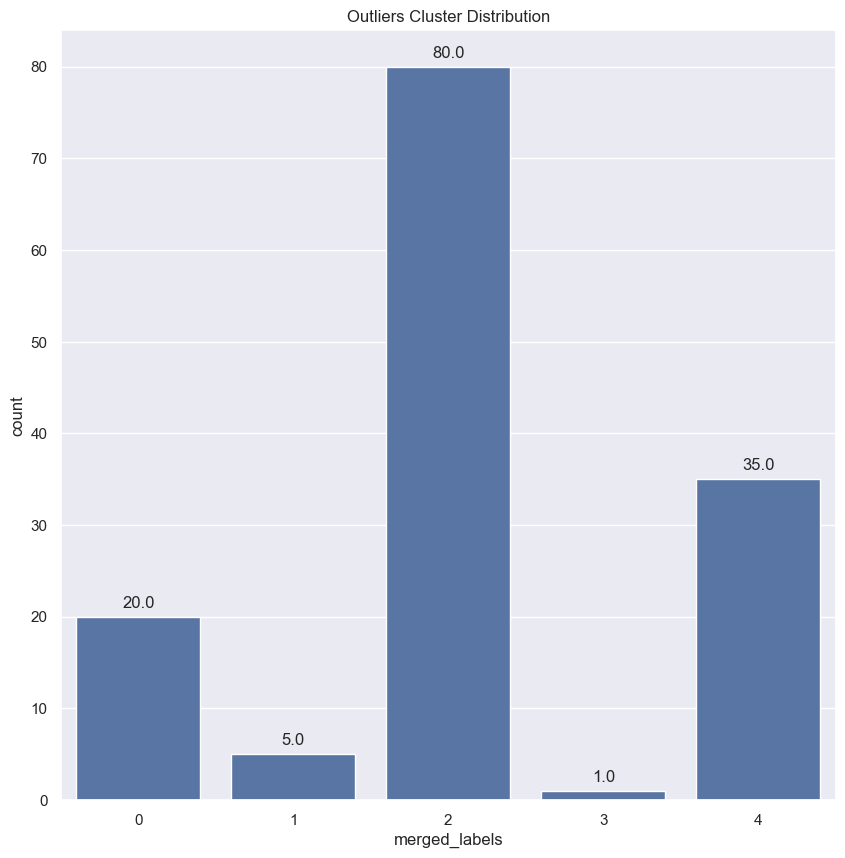

In [397]:
# create a plot for the outliers and their cluster labels
fig, ax = plt.subplots(figsize=(10, 10))

# Just the amount in a bar chart
sns.countplot(data=df_outliers_scaled, x='merged_labels', ax=ax)

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Outliers Cluster Distribution")
plt.show()
